In [17]:
# Use this at the start of each algorithm notebook to get the final dataset
import pandas as pd
import numpy as np
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

final_data_path = '../data/final_data.csv'
df = pd.read_csv(final_data_path, parse_dates=['datetime'])
df.index = df['datetime']

# X and y sets
X = ['demand_5_min_lag','temperature_5_min_lag', 'Is weekday', 'Is weekend', 'regular day', 'public holiday']
y = ['demand']

# Train Data using only 2016 (Jan) - 2020 (Jan) data

df_train = df[df['datetime'] > datetime(2016, 1, 1, 0, 0, 0)]
df_train = df_train[df_train['datetime'] <=  datetime(2020, 3, 19, 0, 0, 0)]
df_train.head()
df_test = df[df['datetime'] > datetime(2020, 3, 19, 0, 0, 0)]


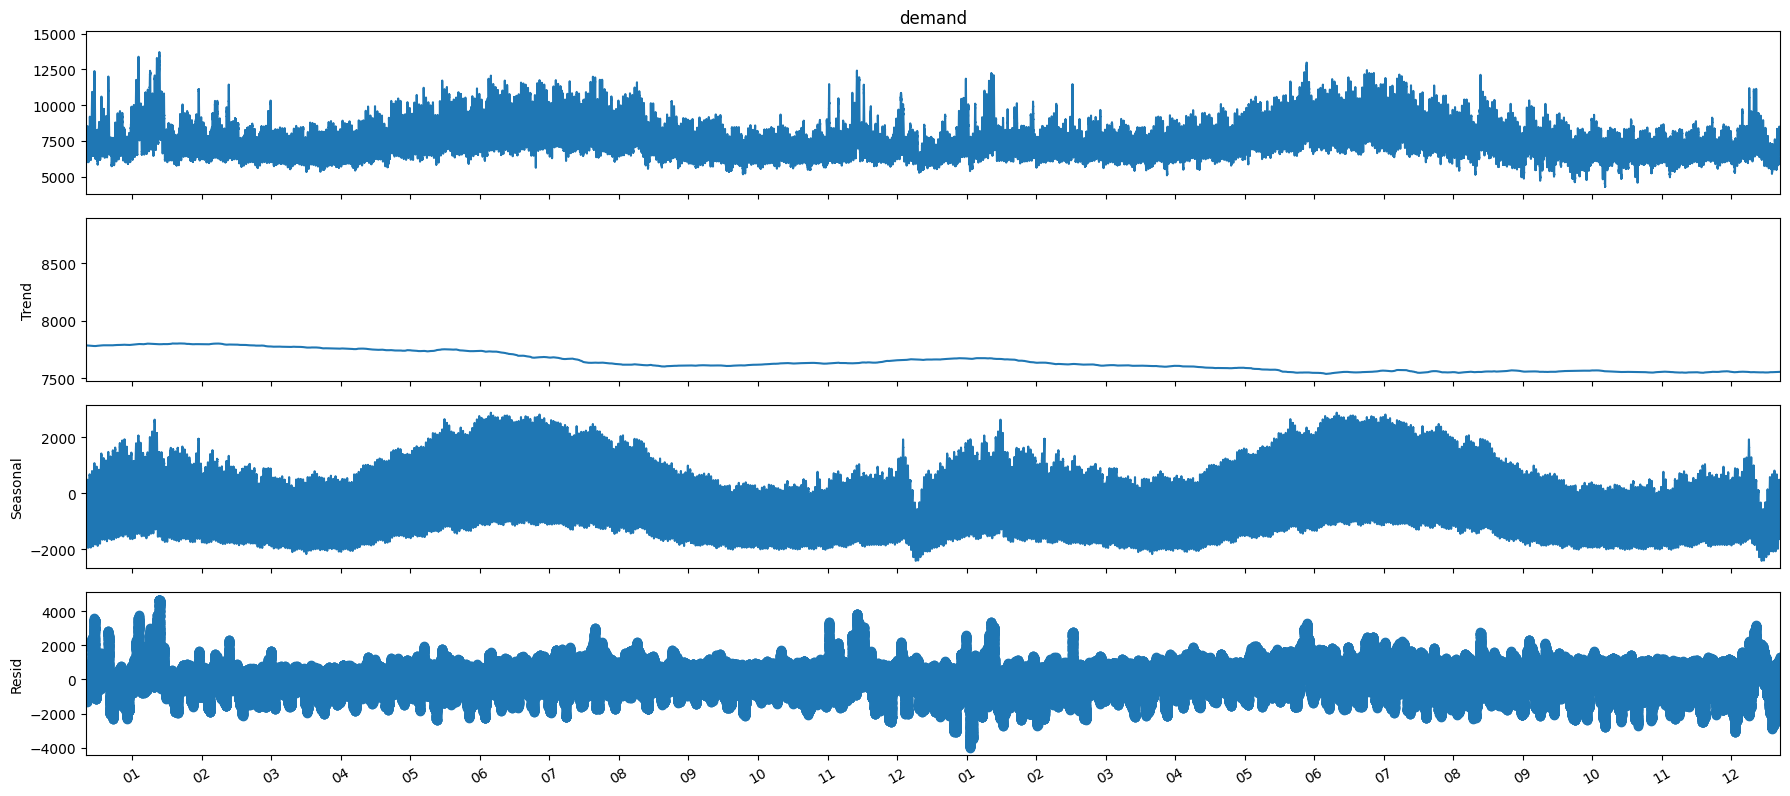

In [18]:
import matplotlib.pyplot as plt
import statsmodels.api as sm
from pylab import rcParams
import matplotlib.dates as mdates

rcParams['figure.figsize'] = 18, 8
decomposition = sm.tsa.seasonal_decompose(df['demand'], model='additive', period = 288*365)
fig = decomposition.plot()
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%m')) 
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=30)) 
plt.gca().xaxis.set_tick_params(rotation = 30)  
plt.gca().set_xbound(datetime(2020, 1, 1,0,0,0), datetime(2022, 1, 1,0,0,0))
plt.show()

In [19]:
from statsmodels.tsa.stattools import adfuller
dftest = adfuller(df.demand, autolag = 'AIC')
print("1. ADF : ",dftest[0])
print("2. P-Value : ", dftest[1])
print("3. Num Of Lags : ", dftest[2])
print("4. Num Of Observations Used For ADF Regression and Critical Values Calculation :", dftest[3])

MemoryError: Unable to allocate 707. MiB for an array with shape (70, 1323268) and data type float64

: 

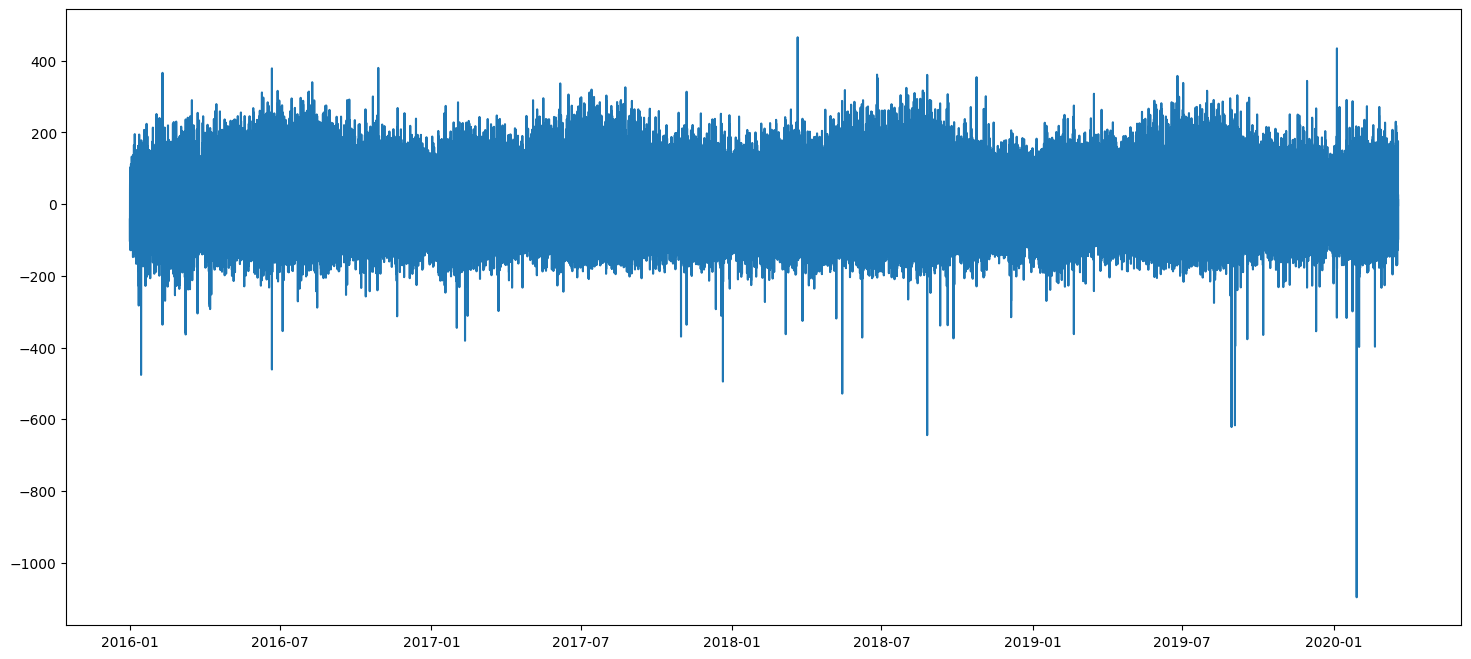

In [3]:
# ARIMA on first difference is suitable as the first difference is stationary
df_train['D.demand'] = df_train['demand'].diff()
plt.plot(df_train.index._mpl_repr(), df_train['D.demand'], '-')
plt.show()

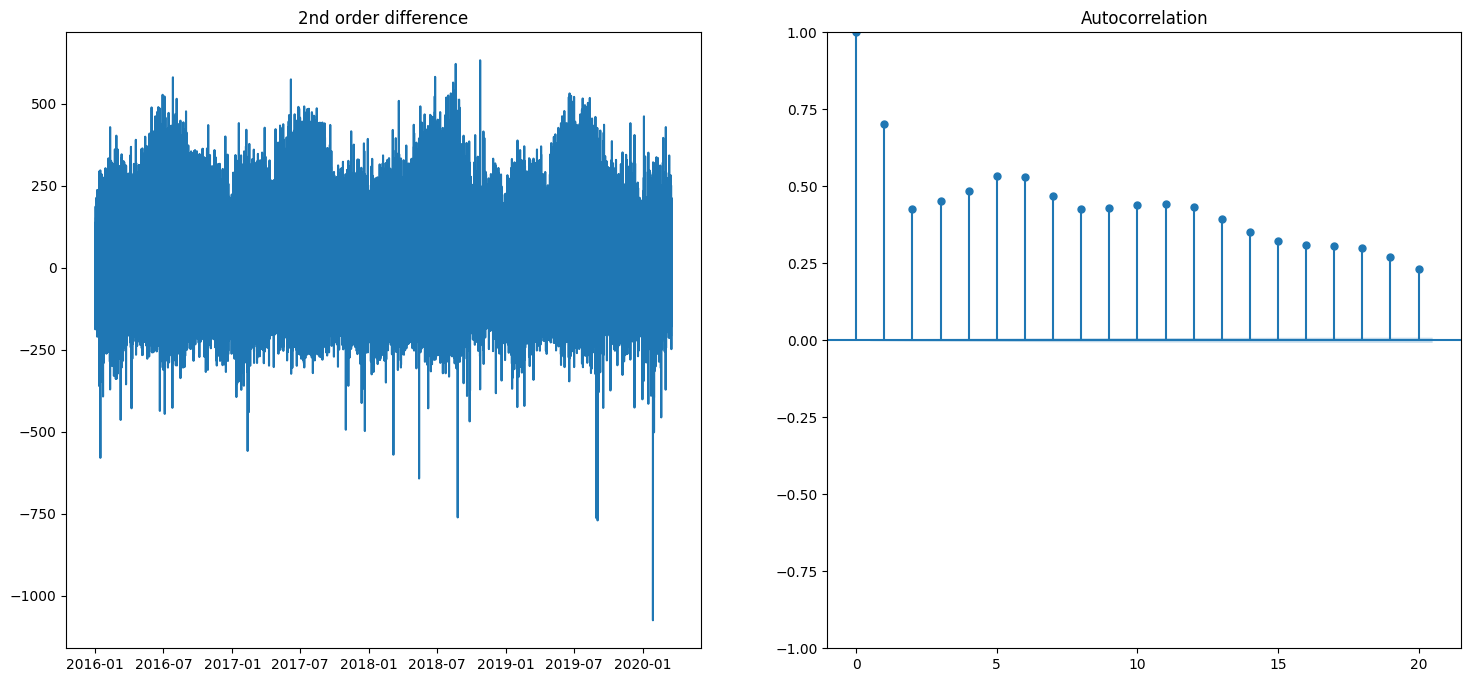

In [5]:
import matplotlib.pyplot as plt
f = plt.figure()
ax1 = f.add_subplot(121)
ax1.set_title('2nd order difference')
ax1.plot(df_train.demand.diff(periods=2))

ax2 = f.add_subplot(122)
plot_acf(df_train.demand.diff(periods=2).dropna(), ax=ax2, lags=20)
plt.show()

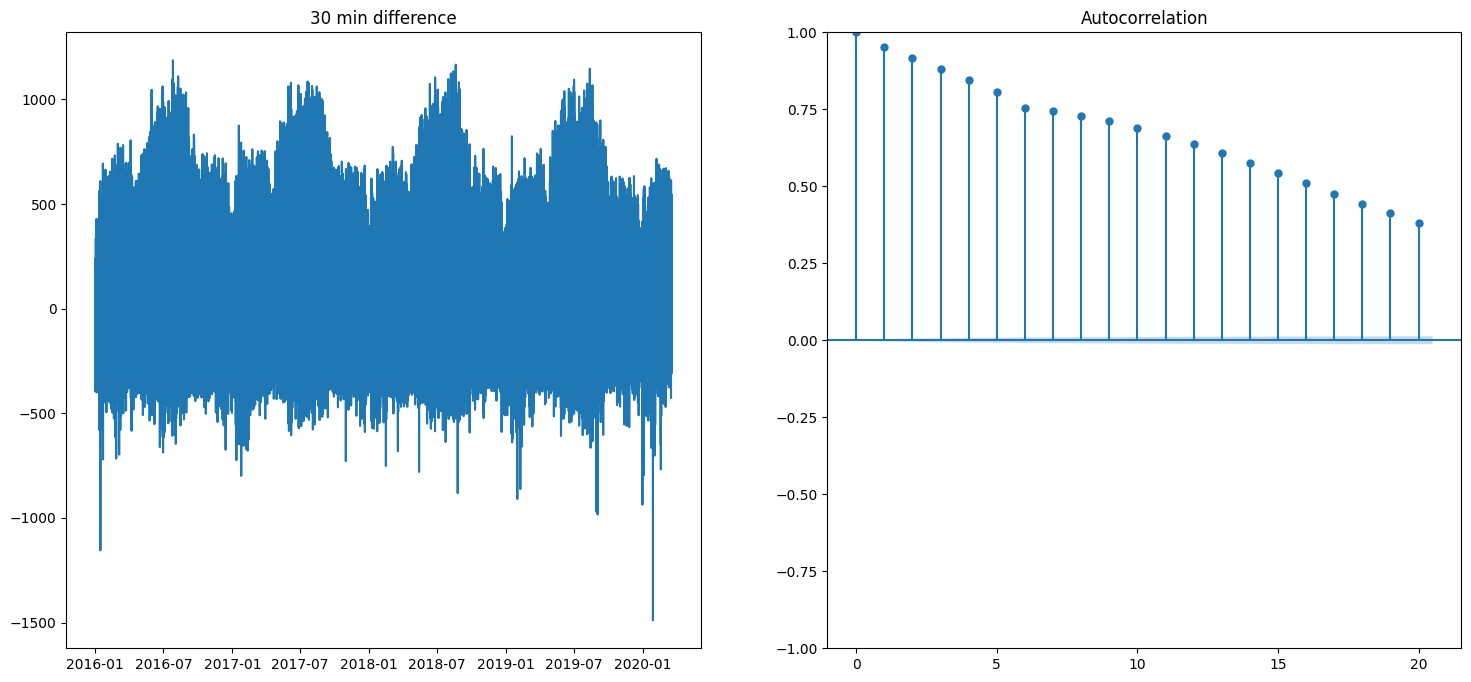

In [6]:
f = plt.figure()
ax1 = f.add_subplot(121)
ax1.set_title('30 min difference')
ax1.plot(df_train.demand.diff(periods=6))

ax2 = f.add_subplot(122)
plot_acf(df_train.demand.diff(periods=6).dropna(), ax=ax2, lags=20)
plt.show()

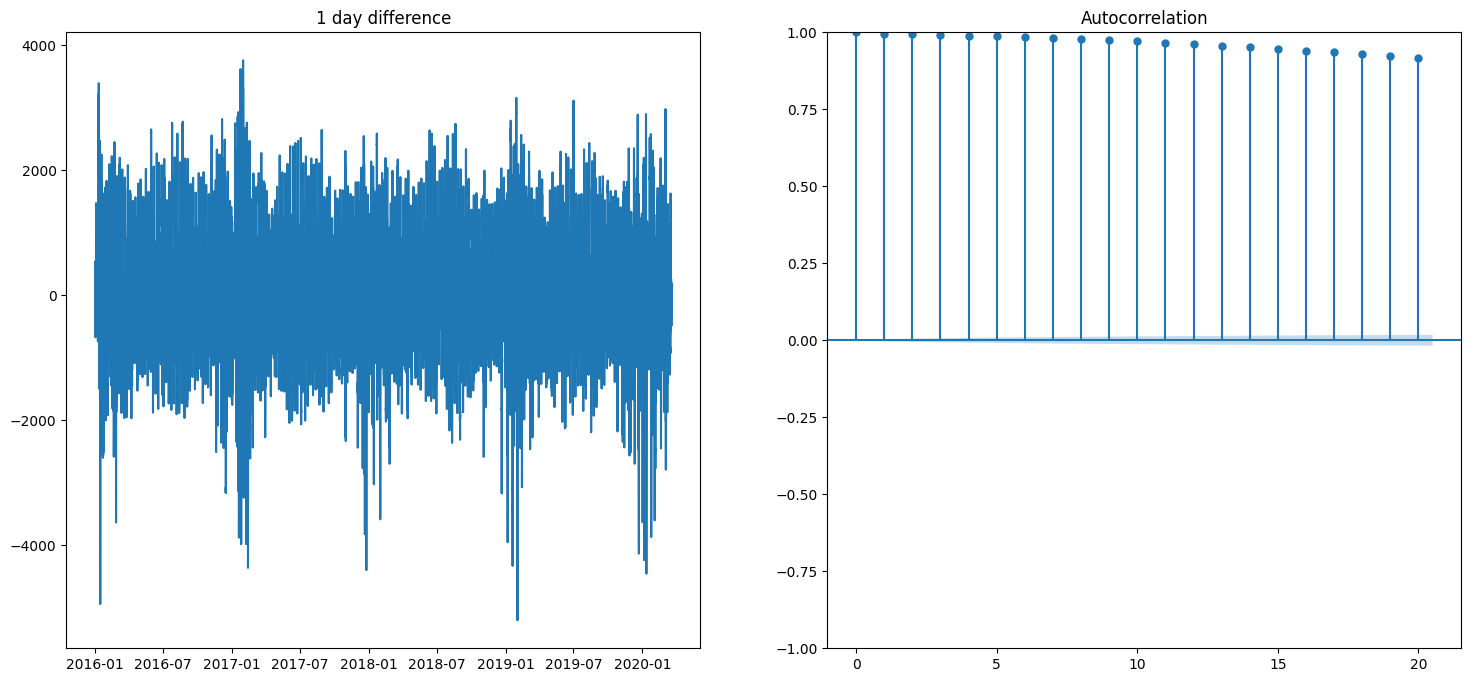

In [7]:
f = plt.figure()
ax1 = f.add_subplot(121)
ax1.set_title('1 day difference')
ax1.plot(df_train.demand.diff(periods=(12*24)))

ax2 = f.add_subplot(122)
plot_acf(df_train.demand.diff(periods=(12*24)).dropna(), ax=ax2, lags=20)
plt.show()

In [8]:
from statsmodels.tsa.arima.model import ARIMA
arima_model = ARIMA(df_train.demand, order=(1,1,2))
arima_model_fit = arima_model.fit()
print(arima_model_fit.summary())

C:\Users\kouro\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\kouro\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\kouro\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g

                               SARIMAX Results                                
Dep. Variable:                 demand   No. Observations:               443245
Model:                 ARIMA(1, 1, 2)   Log Likelihood            -2391256.499
Date:                Wed, 27 Sep 2023   AIC                        4782520.998
Time:                        18:18:43   BIC                        4782565.005
Sample:                             0   HQIC                       4782533.519
                             - 443245                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9713      0.000   2244.562      0.000       0.971       0.972
ma.L1         -1.0179      0.001   -729.227      0.000      -1.021      -1.015
ma.L2          0.1738      0.001    124.664      0.0

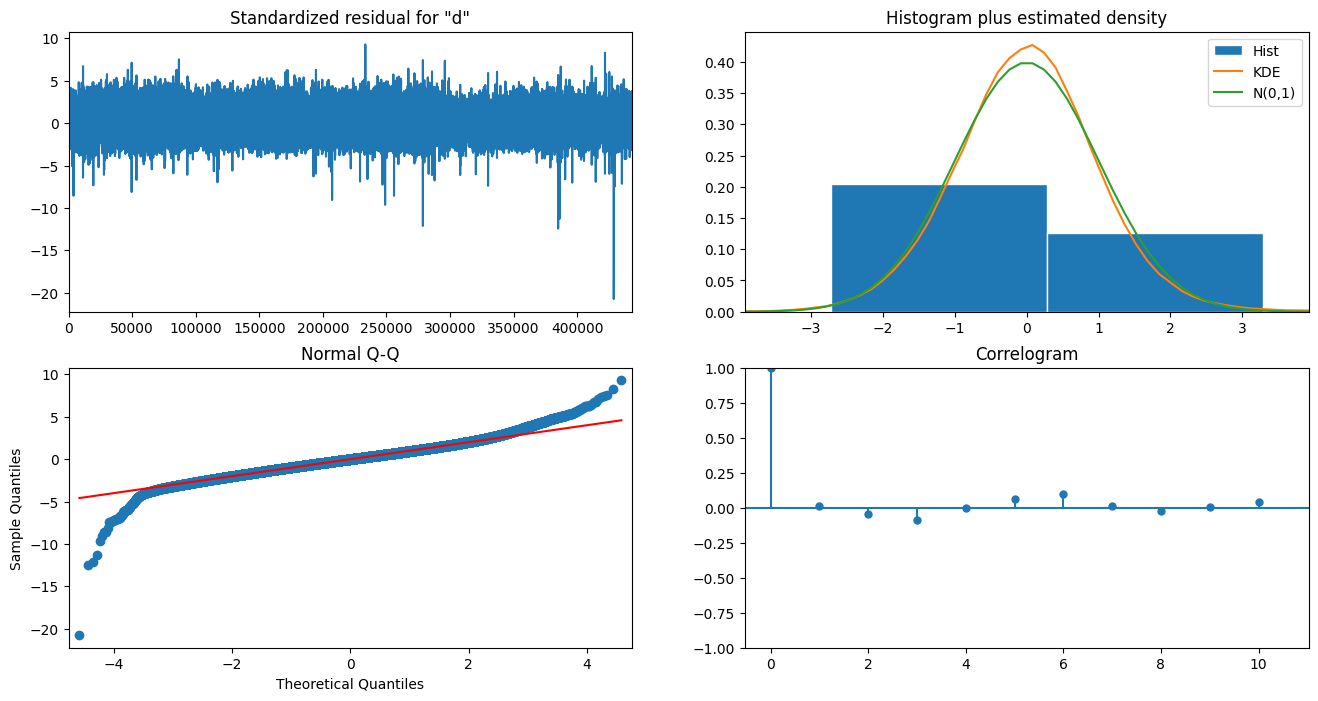

In [9]:
arima_model_fit.plot_diagnostics(figsize=(16, 8))
plt.show()

In [10]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
sarimax_model = SARIMAX(df_train['demand'], order=(1,0,1), seasonal_order=(1,0,1,12))
sarimax_model_fit = sarimax_model.fit()
print(sarimax_model_fit.summary())

C:\Users\kouro\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\kouro\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                                     SARIMAX Results                                      
Dep. Variable:                             demand   No. Observations:               443245
Model:             SARIMAX(1, 0, 1)x(1, 0, 1, 12)   Log Likelihood            -2440497.700
Date:                            Wed, 27 Sep 2023   AIC                        4881005.399
Time:                                    18:24:02   BIC                        4881060.409
Sample:                                         0   HQIC                       4881021.050
                                         - 443245                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.0000   3.68e-05   2.72e+04      0.000       1.000       1.000
ma.L1          0.1331      0.000   

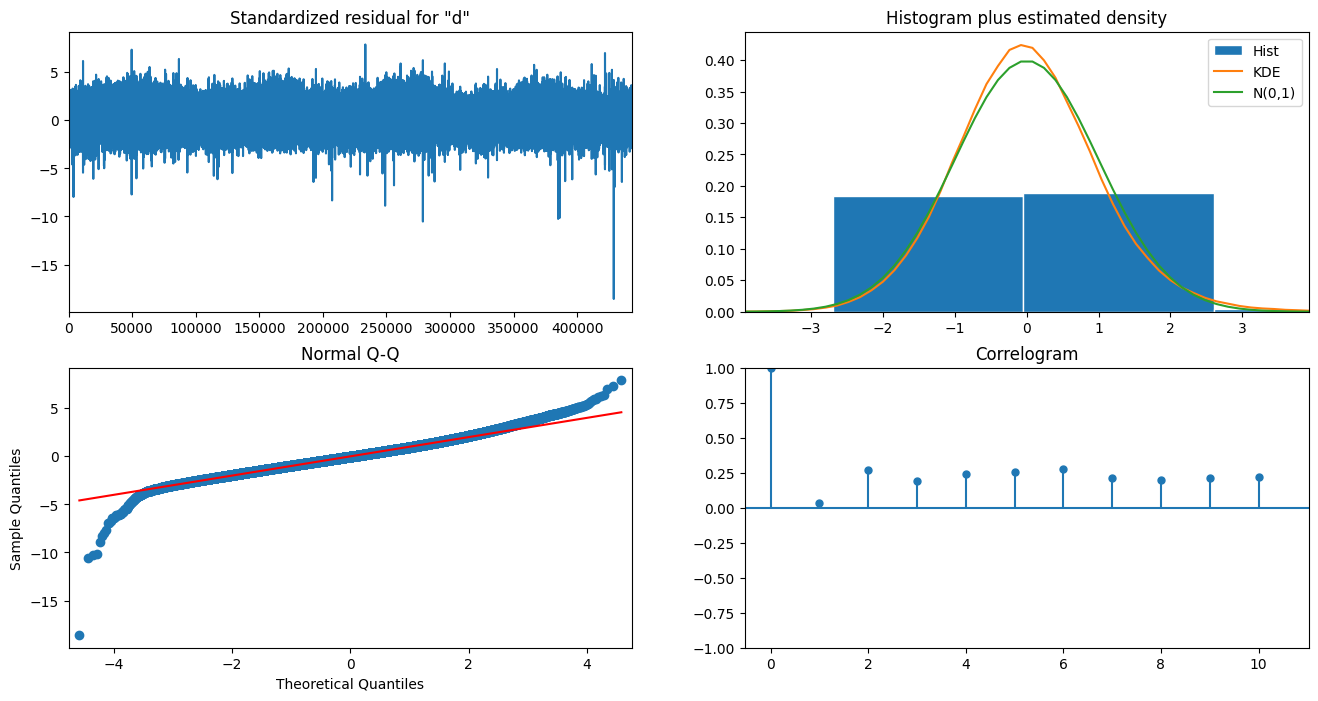

In [11]:
sarimax_model_fit.plot_diagnostics(figsize=(16, 8))
plt.show()